In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 

In [3]:
Reviewdata = pd.read_csv('D:/Flip Robo/projects/projects/Project_1/hotel_train.csv')

In [4]:
Reviewdata.shape

(38932, 5)

In [5]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [6]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id24327,1
Description,38932,38932,wonderful budget hotel in NYC - even if it was...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [8]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        0.681213
not happy    0.318787
Name: Is_Response, dtype: float64


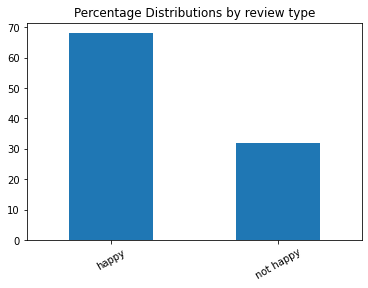

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(Reviewdata.Is_Response.value_counts(normalize=True))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.xticks(rotation='30')
plt.title('Percentage Distributions by review type')
plt.show()

In [10]:
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [11]:
import re
import string

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [12]:
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [13]:
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [14]:
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [15]:
testdata = pd.read_csv('D:/Flip Robo/projects/projects/Project_1/hotel_test.csv')

In [16]:
testdata.shape

(29404, 4)

In [17]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       29404 non-null  object
 1   Description   29404 non-null  object
 2   Browser_Used  29404 non-null  object
 3   Device_Used   29404 non-null  object
dtypes: object(4)
memory usage: 919.0+ KB


In [18]:
testdata.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [19]:
count = testdata.isnull().sum().sort_values(ascending=False)
percentage = ((testdata.isnull().sum()/len(testdata)*100)).sort_values(ascending=False)
missing_data_test = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data_test

Count and percentage of missing values for the columns:


,Count,Percentage
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


In [20]:
testdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [21]:
testdata['cleaned_description'] = pd.DataFrame(testdata.Description.apply(cleaned1))
testdata.head(10)

,Description,cleaned_description
0,Looking for a motel in close proximity to TV t...,looking for a motel in close proximity to tv t...
1,Walking distance to Madison Square Garden and ...,walking distance to madison square garden and ...
2,Visited Seattle on business. Spent - nights in...,visited seattle on business spent nights in t...
3,This hotel location is excellent and the rooms...,this hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...,this hotel is awesome i love the service antho...
5,"Rooms, concierge services and party scene were...",rooms concierge services and party scene were ...
6,What a pleasant place to stay!\nThe hotel is b...,what a pleasant place to stay\nthe hotel is be...
7,I booked out the same day I arrived. It cost m...,i booked out the same day i arrived it cost me...
8,Unlike some hotels that grimace when you show ...,unlike some hotels that grimace when you show ...
9,Hotel Sorella for my birthday. I absolutely lo...,hotel sorella for my birthday i absolutely lov...


In [22]:
testdata['cleaned_description_new'] = pd.DataFrame(testdata['cleaned_description'].apply(cleaned2))
testdata.head(10)

,Description,cleaned_description,cleaned_description_new
0,Looking for a motel in close proximity to TV t...,looking for a motel in close proximity to tv t...,looking for a motel in close proximity to tv t...
1,Walking distance to Madison Square Garden and ...,walking distance to madison square garden and ...,walking distance to madison square garden and ...
2,Visited Seattle on business. Spent - nights in...,visited seattle on business spent nights in t...,visited seattle on business spent nights in t...
3,This hotel location is excellent and the rooms...,this hotel location is excellent and the rooms...,this hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...,this hotel is awesome i love the service antho...,this hotel is awesome i love the service antho...
5,"Rooms, concierge services and party scene were...",rooms concierge services and party scene were ...,rooms concierge services and party scene were ...
6,What a pleasant place to stay!\nThe hotel is b...,what a pleasant place to stay\nthe hotel is be...,what a pleasant place to staythe hotel is beau...
7,I booked out the same day I arrived. It cost m...,i booked out the same day i arrived it cost me...,i booked out the same day i arrived it cost me...
8,Unlike some hotels that grimace when you show ...,unlike some hotels that grimace when you show ...,unlike some hotels that grimace when you show ...
9,Hotel Sorella for my birthday. I absolutely lo...,hotel sorella for my birthday i absolutely lov...,hotel sorella for my birthday i absolutely lov...


In [23]:
test=testdata['cleaned_description_new']

In [24]:
from sklearn.model_selection import train_test_split

X = Reviewdata.cleaned_description_new
Y = Reviewdata.Is_Response

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

print('X_train :', len(X_train))
print('X_test  :', len(X_test))
print('Y_train :', len(Y_train))
print('Y_test  :', len(Y_test))

X_train : 35038
X_test  : 3894
Y_train : 35038
Y_test  : 3894


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [26]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(X_train,Y_train)


from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2497,  253],
       [ 156,  988]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.8145865434001027
Precision :  0.8999104715292978
Recall :  0.8145865434001027


In [31]:
from sklearn.ensemble import RandomForestClassifier as RFC
tvec = TfidfVectorizer()
clf2 = RFC(random_state=42)


In [32]:
model_1 = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model_1.fit(X_train,Y_train)


from sklearn.metrics import confusion_matrix

y_pred = model_1.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2607,  676],
       [  46,  565]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.8145865434001027
Precision :  0.8999104715292978
Recall :  0.8145865434001027


In [34]:
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.tree import DecisionTreeClassifier as DTC
DTC=DTC(max_depth=10,random_state=40)
tvec = TfidfVectorizer()
clf2 = ABC(DTC,random_state=42)


In [35]:
model_2 = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model_2.fit(X_train,Y_train)


from sklearn.metrics import confusion_matrix

y_pred = model_2.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[2246,  545],
       [ 407,  696]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.7555213148433487
Precision :  0.7656480742771803
Recall :  0.7555213148433487


In [37]:
result=model.predict(['I am very disappointed by the hotel'])

In [38]:
result

array(['not happy'], dtype=object)

In [39]:
result=model.predict(['I am very happy by the hotel'])
result

array(['happy'], dtype=object)

In [40]:
result=model.predict(['I am very happy disappointed by the hotel'])
result

array(['not happy'], dtype=object)

In [41]:
result=model_1.predict(['I am very happy by the hotel'])
result

array(['happy'], dtype=object)